# Benford's Law Application and Analysis 
## A Python-based Case Study

#### Introduction 

First, it is necessary to establish the context in both the case's aim and relevant theory. This study is centered around the analysis of Benford's law. The aim is to determine whether the distribution of digits in a number is consistent with Benford's law. This is done by comparing the distribution of digits in a number to Benford's law, specifically the distribution of the leading digit of a number.

We will first apply Benford's law to generate Fibonacci numbers. If the law is consistent, we should see a frequency percentage in the table below. After, we will analyze a synthetic financial fraud dataset and compare the frequency of leading digits to Benford's law to determine if fraud has occurred. I hypothesize that the Fibonacci Sequence will align with Benford's Law; however, the synthetic fraud data will yield significant substantive results and raise concerns about the statistical significance. This is because of the generation of synthetic fraud and its implications on external validity.

Benford's law, also known as the first-digits law, observes that the leading digit is likely to be small in many real-life numerical data sets (Arno et al., 2011). In sets that obey the law, the number one appears as the significant leading digit about 30% of the time, while nine appears as the significant leading digit less than 5% of the time (Weisstein, 2015). In theory, if the numbers were to be uniformly distributed, they would show up 11% of the time. Benford's law predicts distributions for all digits, from one to nine (Weisstein, 2015). Benford's law outlines the probability of leading digits in natiral datasets with a large magnitude of order as the following: 

|Leading digit | Frequency |
| --- | --- | 
| 1 | 30.10% |
| 2 | 17.61% |
| 3 | 12.49% |
| 4 | 9.69% |
| 5 | 7.92% |
| 6 | 6.69% | 
| 7 | 5.80% |
| 8 | 5.12% | 
| 9 | 4.58% |

#### Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Generating Fibonacci Data

The first step in the case study is to generate Fibonacci data to see if Benford's law holds true. We will generate the first 25,000 values in the Fibonacci sequence to test the law.  

In [4]:
f=[1,1]

for i in range(2500):
    f.append(f[i]+f[i+1])



fib_data = str(f) # Saving the fibonacci number in a list to seperate variable

fib_data = [e[1:2] for e in fib_data.split(',')]
fib_data = list(map(int,fib_data))

type(fib_data)

list

#### Frequency Distribution

In [5]:
freq = {}

def count_digits(num):
    remainder = num % 10
    if remainder not in freq:
        freq[remainder] = 1
    else:
        freq[remainder] += 1
    num = num // 10
    if num == 0:
        return
    else:
        count_digits(num)

for num in fib_data: 
    count_digits(num)

print(freq)

{1: 753, 2: 441, 3: 313, 5: 199, 8: 130, 6: 166, 9: 114, 4: 241, 7: 145}


##### Calculating average

In [6]:
for key in freq:
    freq[key] = freq[key]/len(fib_data) * 100 # Calculating the percentage of the frequency

print(freq)

{1: 30.09592326139089, 2: 17.62589928057554, 3: 12.509992006394885, 5: 7.953637090327738, 8: 5.1958433253397285, 6: 6.634692246203038, 9: 4.556354916067146, 4: 9.632294164668265, 7: 5.795363709032774}


#### Fibanacci Visualization & Benford's Law Comparison

In [7]:
fib_df = pd.DataFrame.from_dict(freq, orient='index') # Converting dictionary to dataframe
fib_df.columns = ['Frequency']
fib_df.index.name = 'Digits'
fib_df = fib_df.sort_index()

print(fib_df) # Titling the dataframe

        Frequency
Digits           
1       30.095923
2       17.625899
3       12.509992
4        9.632294
5        7.953637
6        6.634692
7        5.795364
8        5.195843
9        4.556355


Immediately, we can compare the frequency distribution generated by our manipulation of the Fibanacci dataset. Comparing these values to the original Benford's law distribution table in the introduction yields similar results. We can see that 1 leads 30.095% which is consistent with Benford's 30.10%. This is reitirated for the result of the digits, thus the Fibonacci sequence proves that Benford's Law hold true. It should be noted that there are small descrepencies between expected and observed values, the law does not outline a preceise distribution but rather a general pattern which holds true in this scenario.

<AxesSubplot:title={'center':"Benford's Law for Fibbonacci sequence"}, xlabel='Digits'>

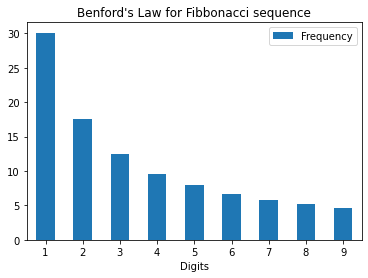

In [8]:
fib_df.plot.bar(y = 'Frequency', title = 'Benford\'s Law for Fibbonacci sequence', rot = 360) # Plotting the dataframe

#### Financial Fraud Detection

Next, we will apply Benford's law to a synethic financial fraud dataset and compare results to analyze the extent of which fraud can be detected. A case between substanstial significance versus statistical significance will need to be made in order to truly achieve a result. 

First, we will import a synthetic financial fraud dataset from [Kaggle](https://www.kaggle.com/datasets/ealaxi/paysim1?resource=download). The context to the data is as follows: *"There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection (Lopez-Rojas, 2016). Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets. We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem (Lopez-Rojas, 2016). PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods (Lopez-Rojas, 2016)."* 

Edgar Lopez-Rojas, the author of the Kaggle dataset also explains that PaySim was utilized to generate the synthetic data. According to his post, PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

Another consideration worth nothing is that this synthetic dataset is scaled down 1/4 of the original dataset.




In [9]:
fraud_df = pd.read_csv('PS_20174392719_1491204439457_log.csv') # Reading the csv file

fraud_df = fraud_df['amount'] # Selecting the amount column

In [10]:
lst = [] # Creating an empty list

for x in fraud_df: # Looping through the amount column
  lst.append(x) # Appending the amount column to the list

freq_fraud = {} # Creating an empty dictionary

for num in lst: # Looping through the list
  if str(num)[0] not in freq_fraud.keys(): # Checking if the first digit is not in the dictionary
    freq_fraud[str(num)[0]] = 1 # If it is not in the dictionary, add it to the dictionary
  else: # If it is in the dictionary add 1 to the value
    freq_fraud[str(num)[0]] += 1  


In [11]:
for key in freq_fraud:
  freq_fraud[key] = (freq_fraud[key]/len(lst))* 100 # Calculating the percentage of the frequency

print(freq_fraud)

{'9': 4.310284128236481, '1': 33.59493416234193, '7': 4.807940753966133, '4': 8.277816371243294, '5': 6.219890548233275, '3': 12.548384156212379, '2': 20.46545291090777, '6': 5.253857687556384, '8': 4.519364664242089, '0': 0.002074617060267626}


<AxesSubplot:title={'center':"Benford's Law for Fraud Data"}, xlabel='Digits'>

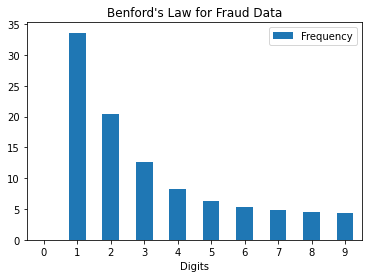

In [15]:
fraud_df = pd.DataFrame.from_dict(freq_fraud, orient='index') # Converting dictionary to dataframe
fraud_df.columns = ['Frequency']
fraud_df.index.name = 'Digits'
fraud_df = fraud_df.sort_index()

fraud_df.plot.bar(y = 'Frequency', title = 'Benford\'s Law for Fraud Data', rot = 360) # Plotting the dataframe

#### Findings 

The table below contains the distribution percentage for the synthetic financial fraud data. As we can see, there is a substantial difference in the fraud data for leading digits of one and two compared to what is observed in the Fibonacci sequence distribution and the expected Benford's Law distribution. These findings are also reiterated for digits four to seven, which also experience a slight deviation from the typical values. However, it is essential to note that these digits appear less than one and two. These observations are reinforced by the two visualizations in each part of this case study. I find this surprising as it is conceivable that those committing frauds are more likely to enter amounts with a higher number to maximize profits. It could also be the case that this was intentionally done to avoid detection. Nevertheless, it would be impossible to know honestly why these numbers vary and if there was an intent behind the amount selected. An experiment where participants are assigned to commit fraud versus a control group that enters their typical amount of money would be worth considering. This would be beneficial to understand the psychology of defrauders. Additionally, more data could be harvested by collecting various environmental variables associated with the proposed experiment.

Last, it is necessary to address the outlier in the dataset. This is evidenced by the appearance of 0 in the distribution percentage. It is illogical for 0 to be the first digit in an amount entered in a given transaction, as this would not appear in the final ledger and does not add value to the transaction. I suspect this is an issue with generating synthetic data, a real dataset would probably not have such outliers. 


| **Digit** | **Fraud Distribution Percentage (%)** | **Fibonacci Distribution Percentage (%)** | **Expected Distribution Percentage (%)** |
|-----------|---------------------------------------|-------------------------------------------|------------------------------------------|
|     1     | 33.59493416234193                     | 30.095923                                 | 30.10                                    |
|     2     | 20.46545291090777                     | 17.625899                                 | 17.61                                    |
|     3     | 12.548384156212379                    | 12.509992                                 | 12.49                                    |
|     4     | 8.277816371243294                     | 9.632294                                  | 9.69                                     |
|     5     | 6.219890548233275                     | 7.953637                                  | 7.92                                     |
|     6     | 5.253857687556384                     | 6.634692                                  | 6.69                                     |
|     7     | 4.807940753966133                     | 5.795364                                  | 5.80                                     |
|     8     | 4.519364664242089                     | 5.195843                                  | 5.12                                     |
|     9     | 4.310284128236481                     | 4.556355                                  | 4.58                                     |

#### Conclusion 

Substantive significance is defined as whether an observed effect is significant enough to be meaningful (Lewis-Beck et al., 2004). In the case of financial fraud data and Benford's law, this is the vital theory that will allow for conclusions to be made. In the findings section of this paper, we highlighted the differences from the expected values in contrast to the observed distribution of the fraud data and generated Fibonacci data. For the fraud distribution digits of one and two, there is a clear difference from what would be expected. Although the numeric difference is slight, we know this is substantially significant with context to the data. The slight variation further reinforces this observed in the Fibonacci distribution; the dramatic increase in the fraud distribution further highlights discrepancies. We could therefore say that it is plausible to detect fraud using Benford's law. However, given the data is spanning over numerous accounts, this does not provide us with significant insights into which account fraudulent activity has occurred. Assuming a normal distribution, potentially combining Z-scores with an algorithm constantly checking individual bank accounts might yield a more concrete use-case scenario for Benford's law and financial fraud detection. The former half of this proposal was discussed by Economist Hal Varian who outlined such an idea in his 1972 letter. For these reasons, statistical significance cannot be determined as there are issues with the inherent collection of data and the limitation of the entire dataset. Statistical significance is whether an observed result is due to some factor or extraneous variables (Lewis-Beck et al., 2004). Additionally, given the context of the data being related to a specific geographical location, it is also hard to establish external validity. Our findings, therefore, probably have greater internal generalizability to the content of Africa rather than the entire world. 

All in all, this case study provided valuable insight into a unique mathematical phenomenon. It was interesting to learn the various methods needed to analyze the different data. Hopefully one day this beautiful law can help make the world a better place by detecing fradualent activities in the world's financial institutions.

#### Bibliography
E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Arno Berger and Theodore P Hill, [Benford's Law Strikes Back: No Simple Explanation in Sight for Mathematical Gem](https://digitalcommons.calpoly.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1074&context=rgp_rsr), 2011 

Weisstein, Eric W. ["Benford's Law"](https://mathworld.wolfram.com/BenfordsLaw.html). MathWorld, A Wolfram web resource. Retrieved 7 June 2015. 

Lewis-Beck, M. S., Bryman, A., & Futing Liao, T. (2004). [Substantive significance & Statistical Significance](https://dx.doi.org/10.4135/9781412950589.n985).In The SAGE encyclopedia of social science research methods (pp. 1099-1100). Sage Publications, Inc. 

Varian, Hal (1972). "Benford's Law (Letters to the Editor)". The American Statistician. 26 (3): 65. doi:10.1080/00031305.1972.10478934.

